# Required

In [1]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get different metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

# To get different metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error


In [8]:
# survey data
# survey data
data_survey = pd.read_csv(r"C:\Users\leenm\Documents\MIT\Surveydata_train.csv")

In [9]:
# travel data
data_travel=pd.read_csv(r"C:\Users\leenm\Documents\MIT\Traveldata_train.csv")

In [10]:
data_survey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [11]:
data_travel.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [12]:
data_travel.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [13]:
#merging data
data_join= pd.merge(data_survey, data_travel, on="ID")

In [14]:
data_join.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [15]:
# copy data to another variable
df=data_join.copy()

In [16]:
df.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [17]:
df.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,...,Good,Poor,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,...,Acceptable,Good,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,...,Good,Acceptable,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,...,Excellent,Good,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,...,Good,Acceptable,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [18]:
#check shape
df.shape

(94379, 25)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

In [20]:
#missing values
df.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [21]:
# Let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

ID                         0.00
Overall_Experience         0.00
Seat_Comfort               0.06
Seat_Class                 0.00
Arrival_Time_Convenient    9.46
Catering                   9.26
Platform_Location          0.03
Onboard_Wifi_Service       0.03
Onboard_Entertainment      0.02
Online_Support             0.10
Ease_of_Online_Booking     0.08
Onboard_Service            8.05
Legroom                    0.10
Baggage_Handling           0.15
CheckIn_Service            0.08
Cleanliness                0.01
Online_Boarding            0.01
Gender                     0.08
Customer_Type              9.48
Age                        0.03
Type_Travel                9.78
Travel_Class               0.00
Travel_Distance            0.00
Departure_Delay_in_Mins    0.06
Arrival_Delay_in_Mins      0.38
dtype: float64

In [22]:
#check duplicates
df.duplicated().sum()

0

In [23]:
df.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

In [24]:
#Drop ID column
df.drop(columns='ID', inplace=True)

In [25]:
df.head()

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [26]:
# Creating categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Check the count of each unique value for each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Seat_Comfort
Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: count, dtype: int64
--------------------------------------------------
Seat_Class
Green Car    47435
Ordinary     46944
Name: count, dtype: int64
--------------------------------------------------
Arrival_Time_Convenient
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: count, dtype: int64
--------------------------------------------------
Catering
Acceptable           18468
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: count, dtype: int64
--------------------------------------------------
Platform_Location
Manageable           24173
Convenient           21912
Needs Improvement    17832
Inconvenient

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0


In [28]:
df.describe(include=["object"]).T

,count,unique,top,freq
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835
Onboard_Entertainment,94361,6,Good,30446
Online_Support,94288,6,Good,30016
Ease_of_Online_Booking,94306,6,Good,28909
Onboard_Service,86778,6,Good,27265


# UNIVARIATE

In [ ]:
# Create function to show both histogram and box plot in one line of code. For numerical columns
def hist_box(df, col):
    f, (boxplt, histogm) = plt.subplots(2, sharex=True, figsize=(12,6))
    # Adding a graph in each part
    sns.boxplot(data=df, x=col, ax=boxplt, showmeans=True)
    sns.histplot(data=df, x=col, kde=True, ax=histogm)
    plt.show()

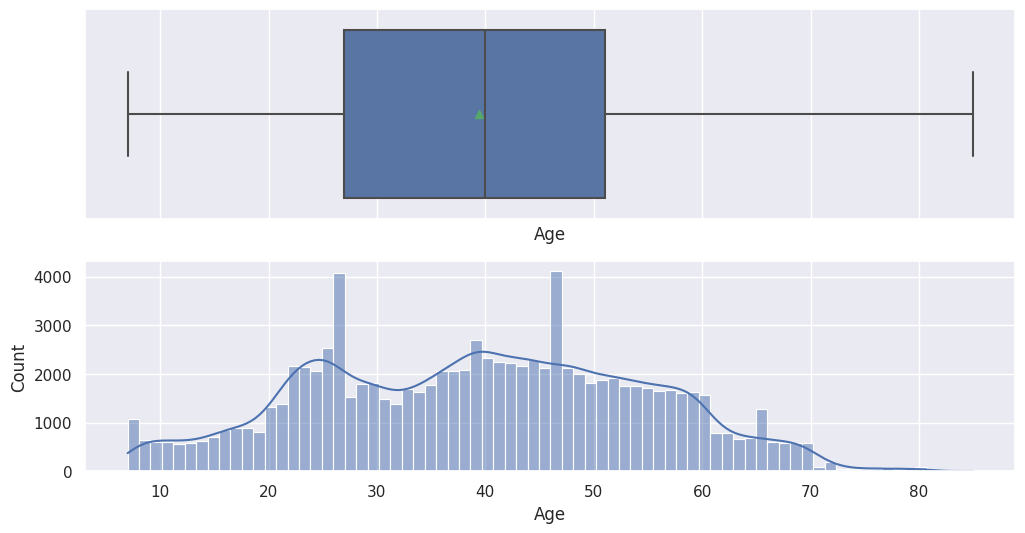

In [ ]:
hist_box(df, "Age")

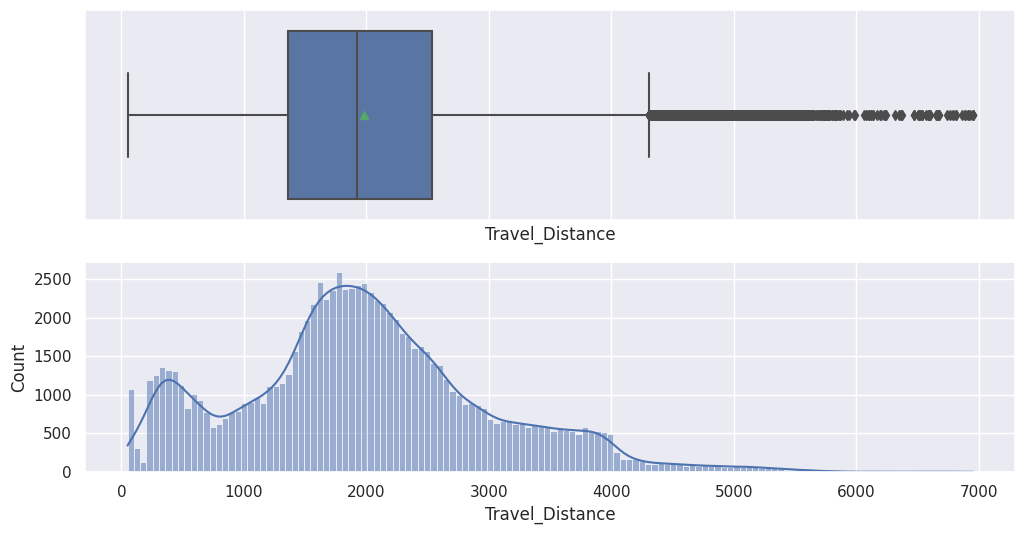

In [ ]:
hist_box(df, "Travel_Distance")

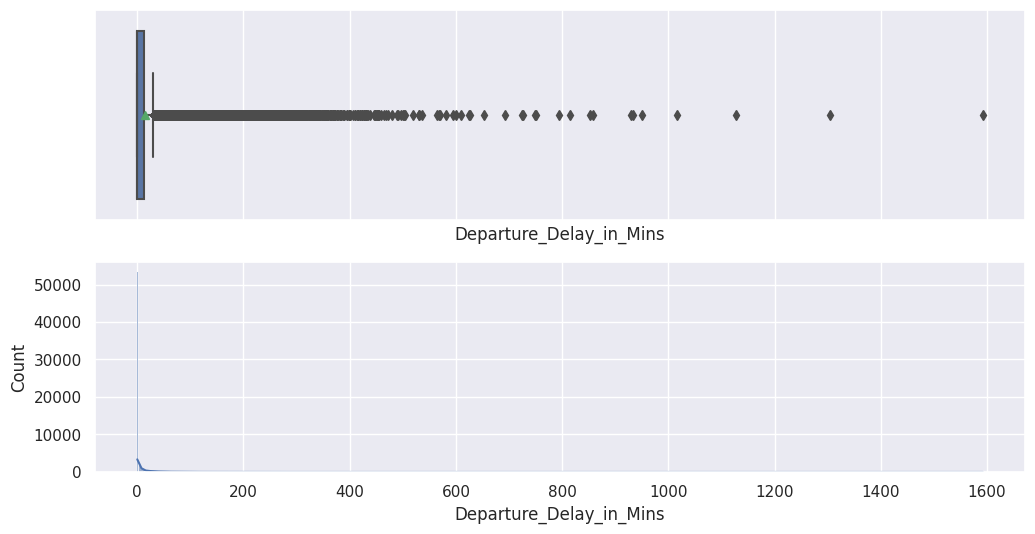

In [ ]:
hist_box(df, "Departure_Delay_in_Mins")

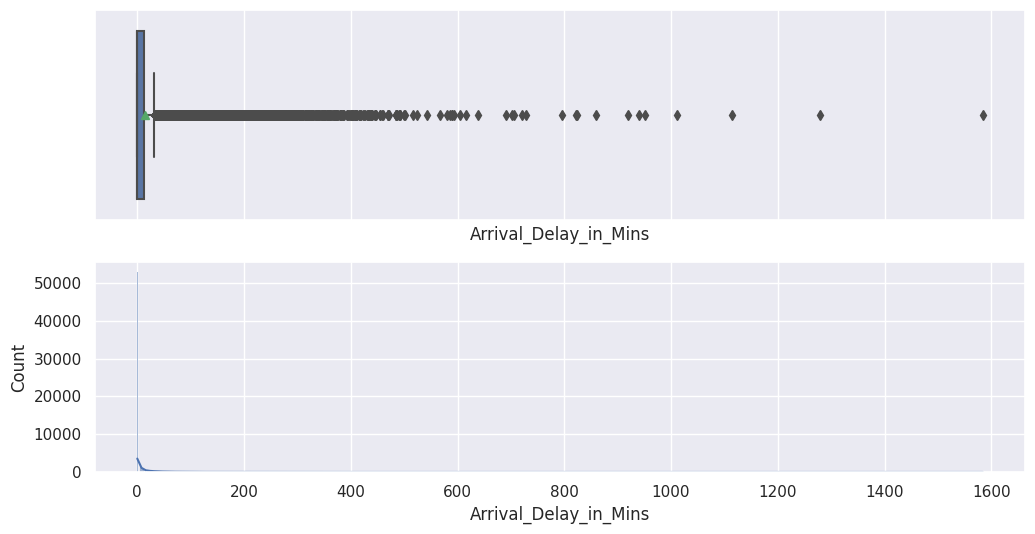

In [ ]:
hist_box(df, "Arrival_Delay_in_Mins")

**BIVARIATE**

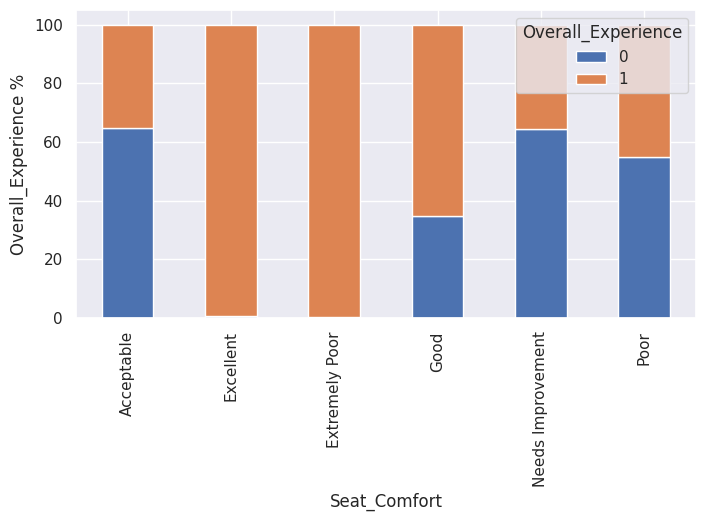

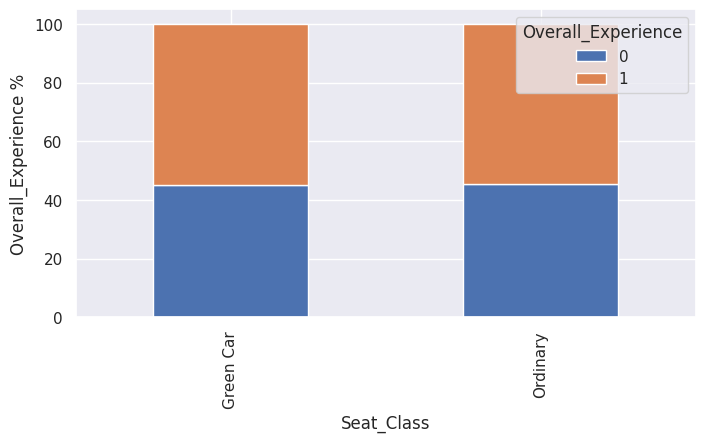

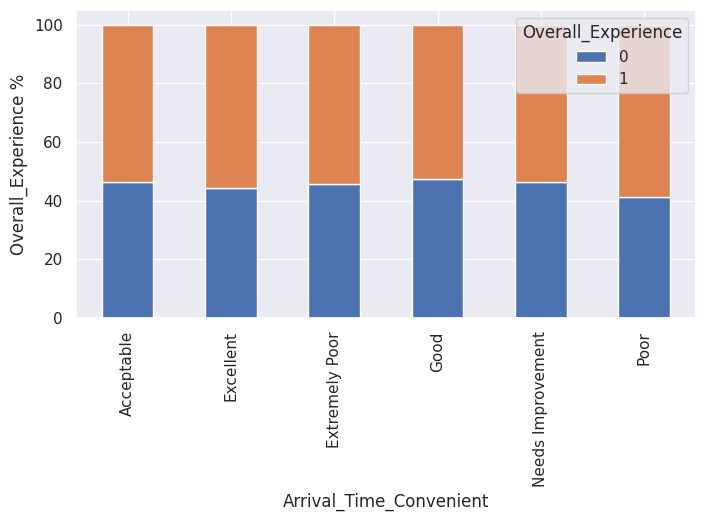

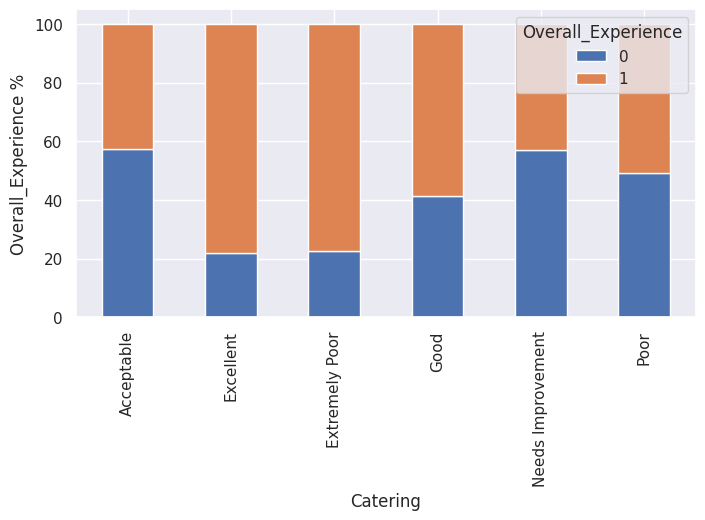

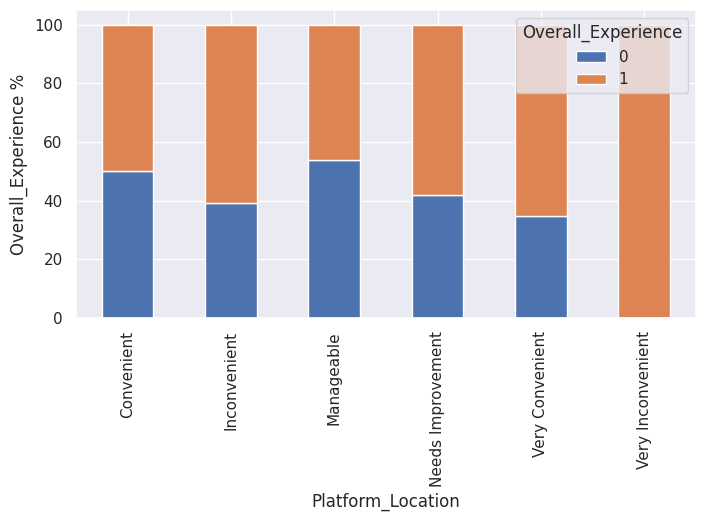

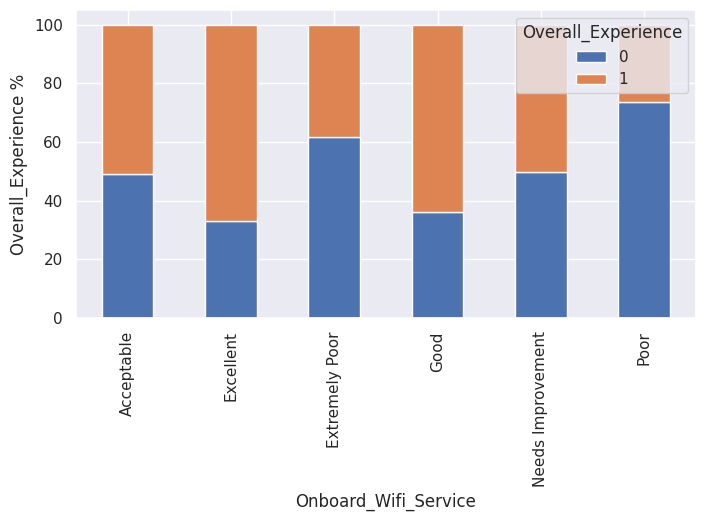

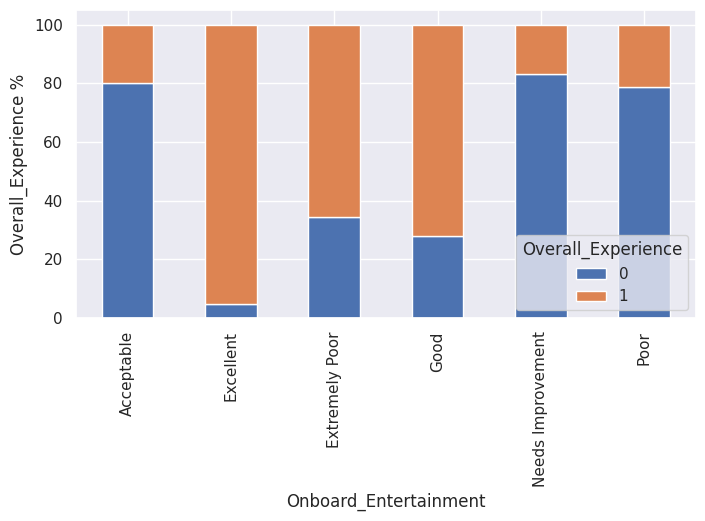

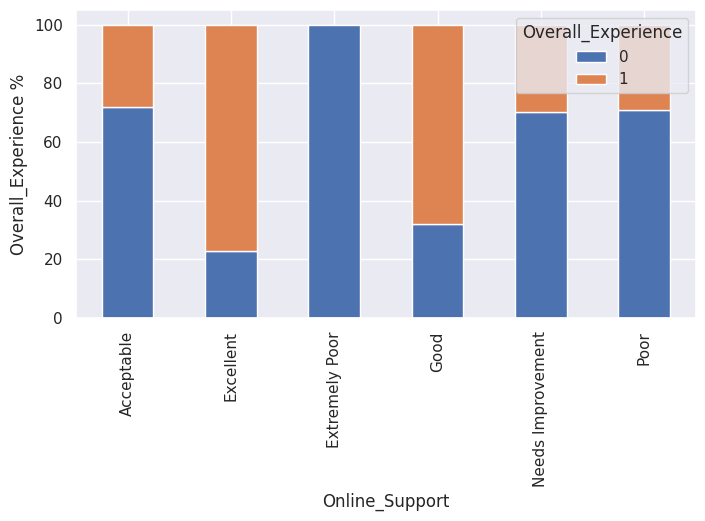

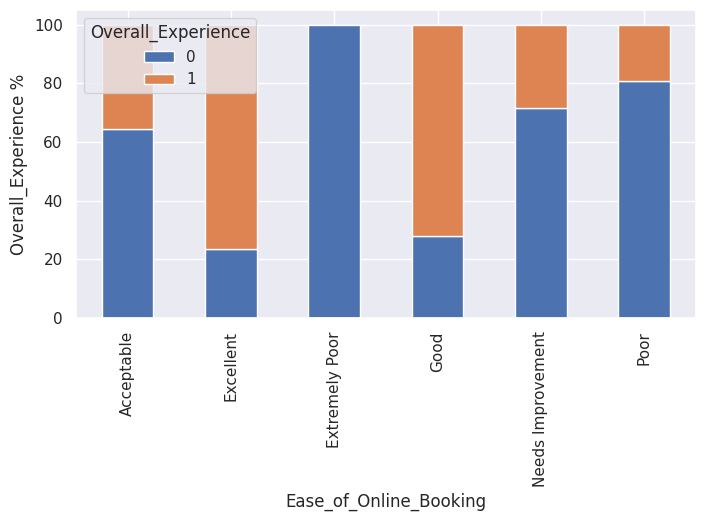

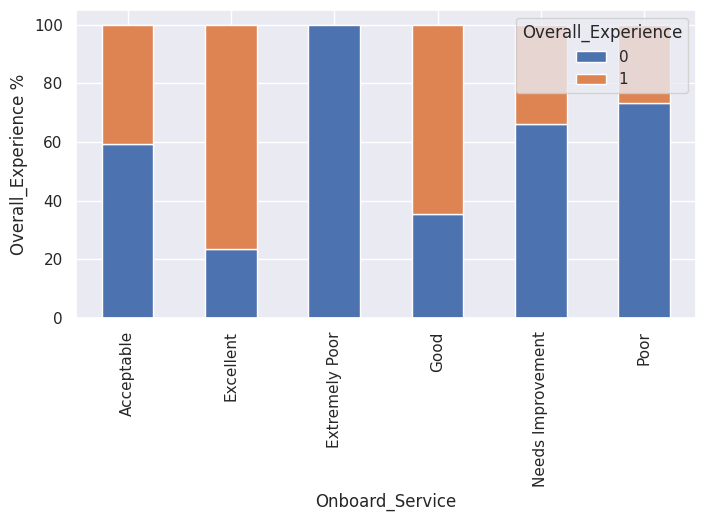

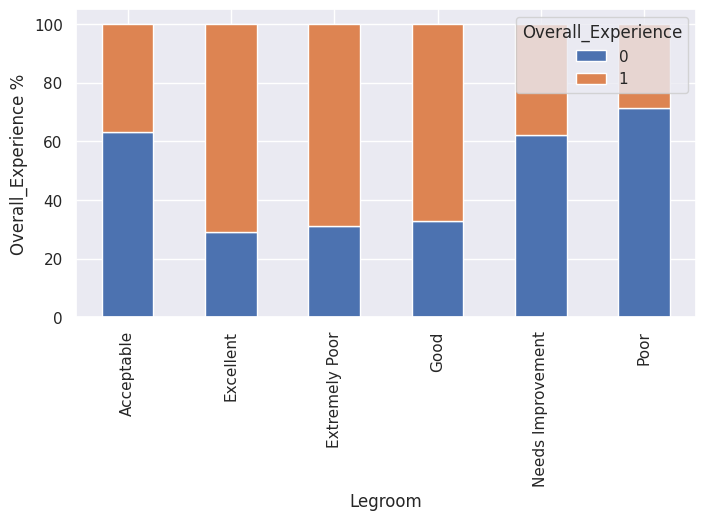

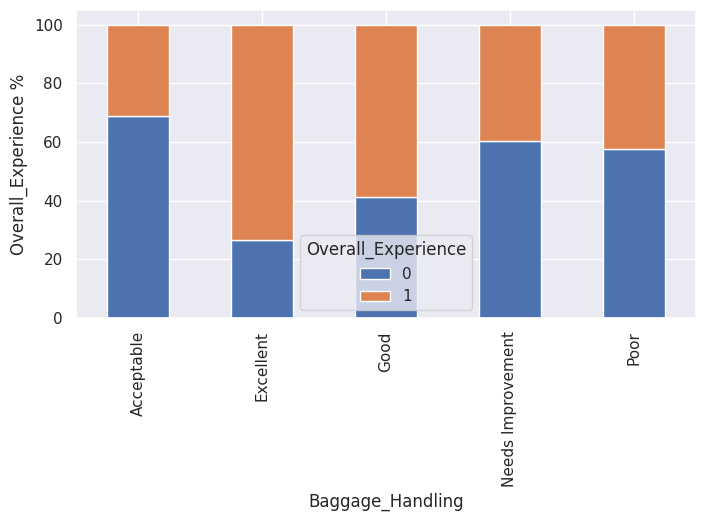

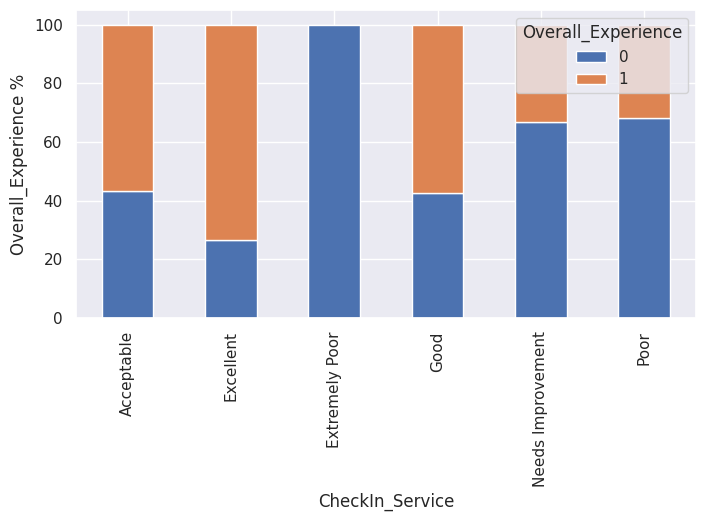

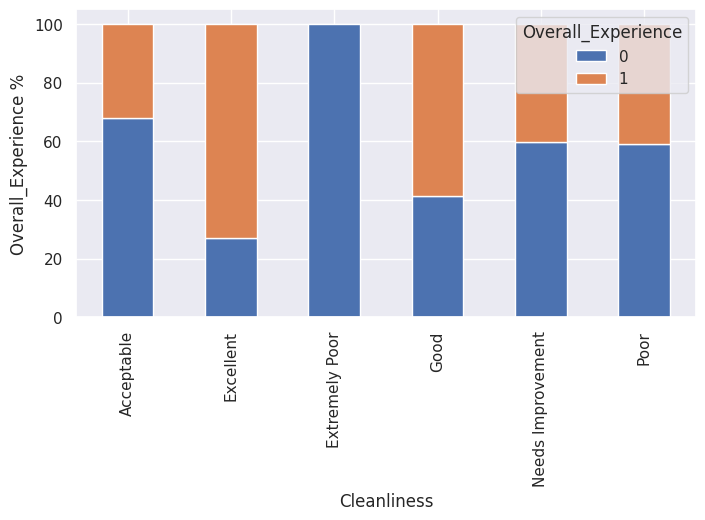

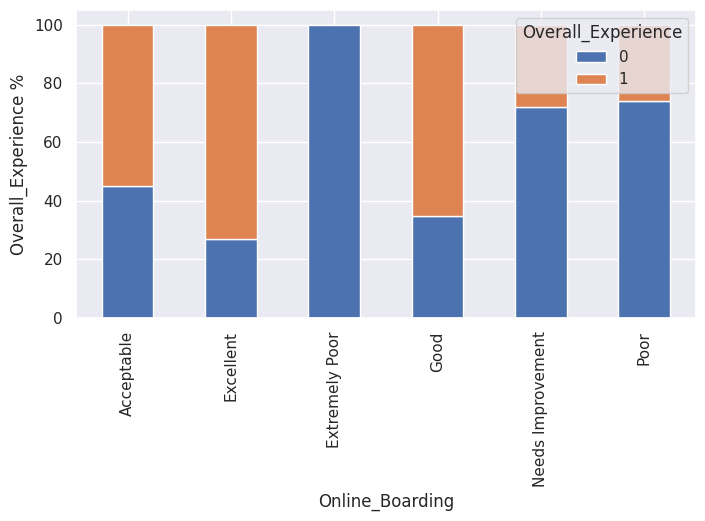

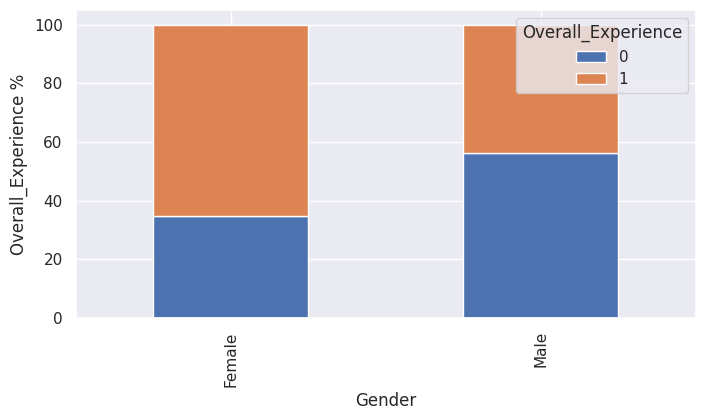

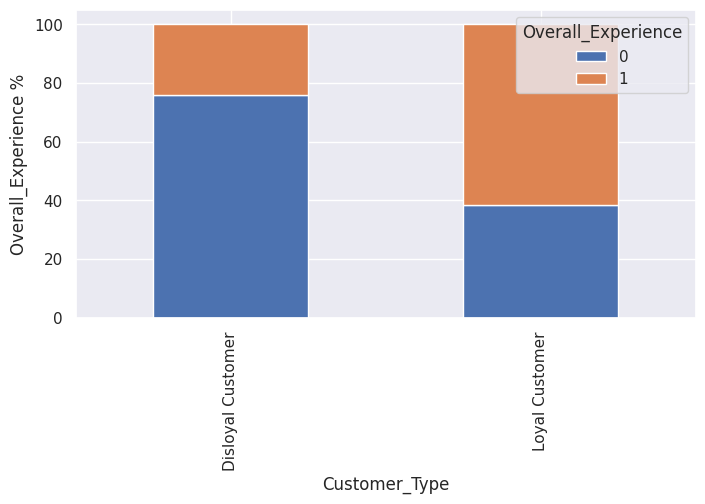

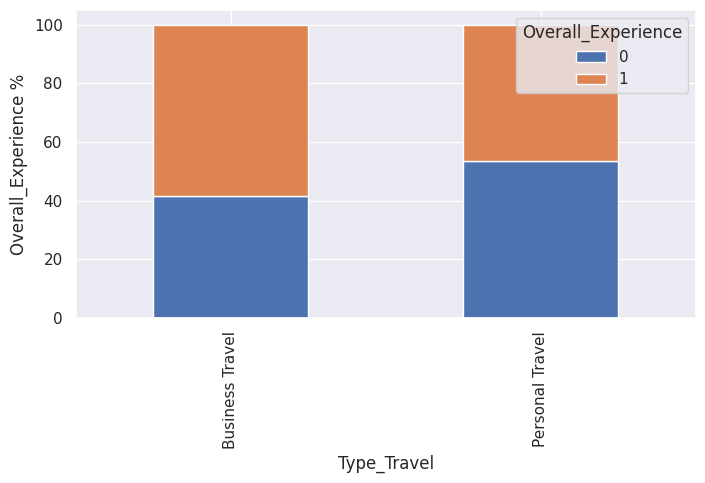

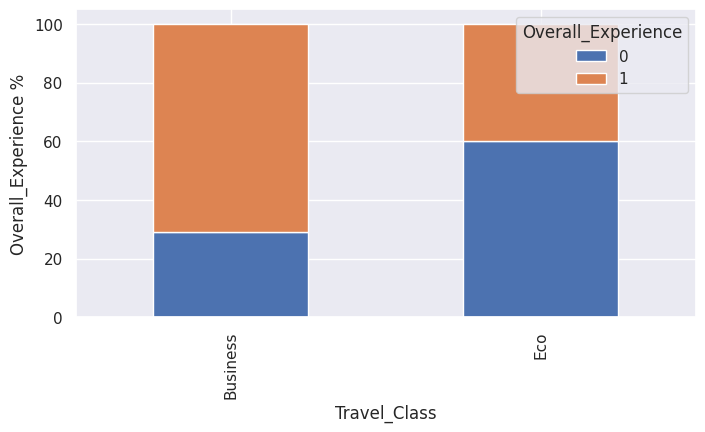

In [ ]:
for i in cat_col:
    if i!='Overall_Experience':
        (pd.crosstab(df[i],df['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Overall_Experience %')

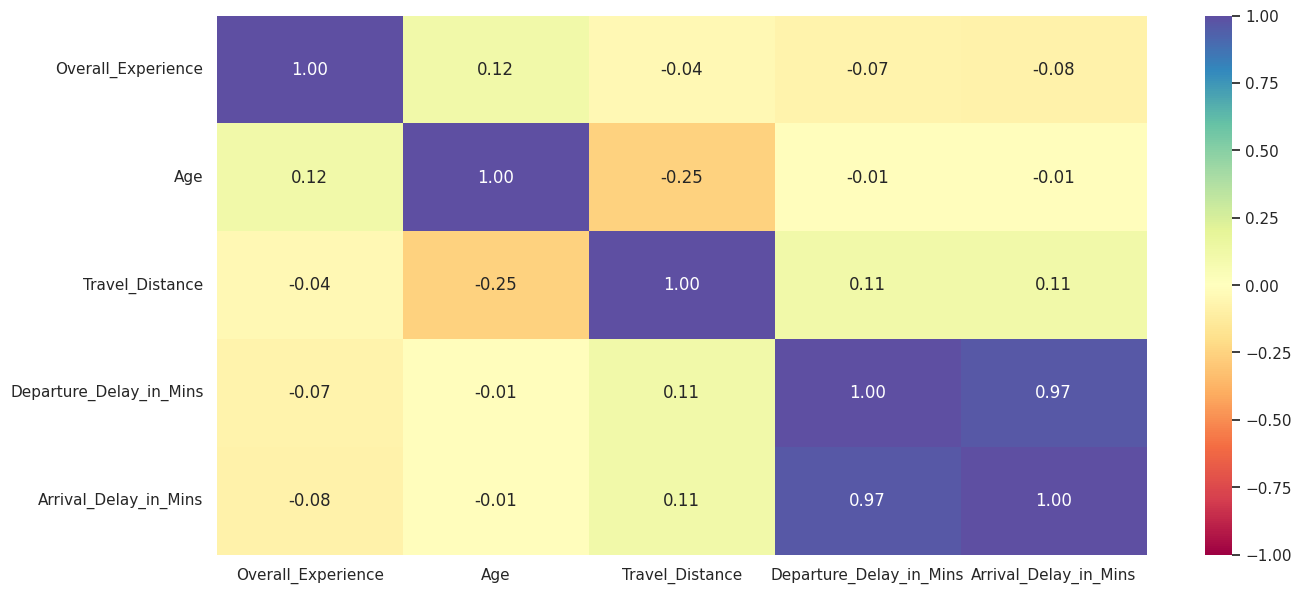

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observation: High +ve correlation between departure delay & arrival delay**



In [ ]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
Seat_Comfort,61,0.064633
Arrival_Time_Convenient,8930,9.461851
Catering,8741,9.261594
Platform_Location,30,0.031787
Onboard_Wifi_Service,30,0.031787
Onboard_Entertainment,18,0.019072
Online_Support,91,0.096420
Ease_of_Online_Booking,73,0.077348
Onboard_Service,7601,8.053698
Legroom,90,0.095360


**Missing Values Less than 1%**:
*   Impute Mean: Age
*   Impute Median: Departure_Delay_in_Mins, Arrival_Delay_in_Mins
*   Impute Mode: Seat_Comfort, Platform_Location, Onboard_Wifi_service,Onboard_Entertainment, Online_Support,Ease_of_Online_Booking, Legroom, Baggage_Handling, CheckIn_Service , Cleanliness, Online_Boarding, Gender



**Missing Values around than 9-10%**:


*   Arrival_Time_Convenient
*   Catering
*   Customer_Type
*   Onboard_Service
*   Type_Travel

remove the 9-10% null values from these columns







In [ ]:
#dropping all rows with missing values and creating a new dataframe df2
cols_to_remove= ['Arrival_Time_Convenient', 'Catering', 'Customer_Type', 'Onboard_Service', 'Type_Travel']
df2 = new_df.dropna(subset=cols_to_remove)

In [ ]:
#Checking for missing values in df2
pd.DataFrame({'Count':df2.isnull().sum()[df2.isnull().sum()>0],'Percentage':(df2.isnull().sum()[df2.isnull().sum()>0]/df2.shape[0])*100})

,Count,Percentage


In [ ]:
df2['Age'] = df2['Age'].astype(int)

In [ ]:
#Convert 'Age' column to integer type as these have discrete values
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55744 entries, 1 to 94375
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       55744 non-null  int64  
 1   Seat_Comfort             55744 non-null  object 
 2   Seat_Class               55744 non-null  object 
 3   Arrival_Time_Convenient  55744 non-null  object 
 4   Catering                 55744 non-null  object 
 5   Platform_Location        55744 non-null  object 
 6   Onboard_Wifi_Service     55744 non-null  object 
 7   Onboard_Entertainment    55744 non-null  object 
 8   Online_Support           55744 non-null  object 
 9   Ease_of_Online_Booking   55744 non-null  object 
 10  Onboard_Service          55744 non-null  object 
 11  Legroom                  55744 non-null  object 
 12  Baggage_Handling         55744 non-null  object 
 13  CheckIn_Service          55744 non-null  object 
 14  Cleanliness           

# Catboost model

In [29]:
#listing all columns
cat_col

['Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class']

In [30]:
#checking
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

,Count,Percentage
Seat_Comfort,61,0.064633
Arrival_Time_Convenient,8930,9.461851
Catering,8741,9.261594
Platform_Location,30,0.031787
Onboard_Wifi_Service,30,0.031787
Onboard_Entertainment,18,0.019072
Online_Support,91,0.096420
Ease_of_Online_Booking,73,0.077348
Onboard_Service,7601,8.053698
Legroom,90,0.095360


In [31]:
# Convert NaNs to "missing" for categorical columns
for column in cat_col:
    df[column] = df[column].fillna('missing')

In [32]:
X3 = df.drop('Overall_Experience', axis=1)
y3 = df['Overall_Experience']

In [33]:
X3.head()

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,missing,Business,272,0.0,5.0
1,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,Acceptable,Ordinary,Needs Improvement,missing,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [34]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seat_Comfort             94379 non-null  object 
 1   Seat_Class               94379 non-null  object 
 2   Arrival_Time_Convenient  94379 non-null  object 
 3   Catering                 94379 non-null  object 
 4   Platform_Location        94379 non-null  object 
 5   Onboard_Wifi_Service     94379 non-null  object 
 6   Onboard_Entertainment    94379 non-null  object 
 7   Online_Support           94379 non-null  object 
 8   Ease_of_Online_Booking   94379 non-null  object 
 9   Onboard_Service          94379 non-null  object 
 10  Legroom                  94379 non-null  object 
 11  Baggage_Handling         94379 non-null  object 
 12  CheckIn_Service          94379 non-null  object 
 13  Cleanliness              94379 non-null  object 
 14  Online_Boarding       

In [35]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [36]:
#Splitting the Dataset:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)


In [37]:
#Importing libraries
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Training the model
model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=7, cat_features=cat_col, verbose=200)
model.fit(X3_train, y3_train)


0:	learn: 0.6348425	total: 358ms	remaining: 2m 58s
200:	learn: 0.1066403	total: 39.7s	remaining: 59s
400:	learn: 0.0912081	total: 1m 17s	remaining: 19s
499:	learn: 0.0865275	total: 1m 37s	remaining: 0us


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30178
           1       0.97      0.96      0.97     35887

    accuracy                           0.97     66065
   macro avg       0.96      0.97      0.96     66065
weighted avg       0.97      0.97      0.97     66065



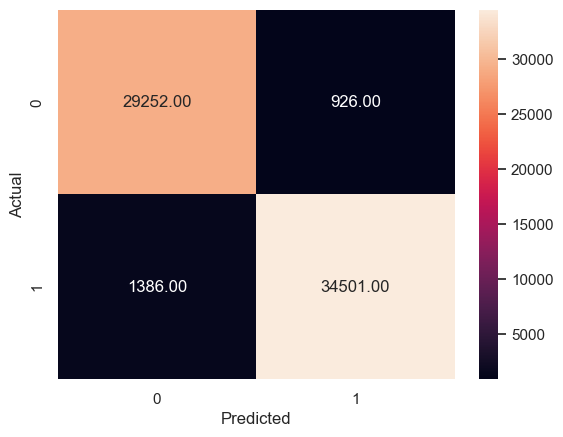

In [38]:
#checking on train set
y_pred_train6 = model.predict(X3_train)
metrics_score(y3_train, y_pred_train6)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12608
           1       0.97      0.95      0.96     15706

    accuracy                           0.96     28314
   macro avg       0.96      0.96      0.96     28314
weighted avg       0.96      0.96      0.96     28314



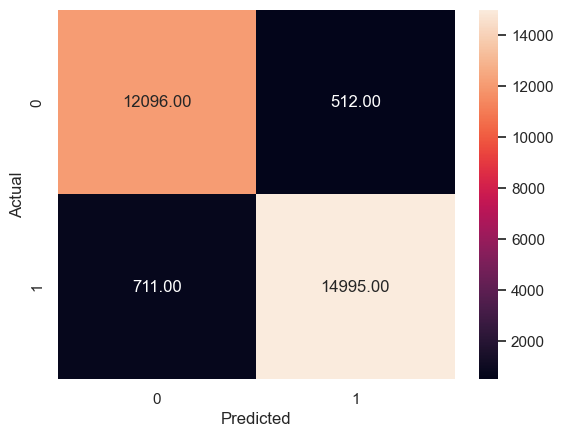

In [39]:
#checking on test set
y_pred_test6 = model.predict(X3_test)
metrics_score(y3_test, y_pred_test6)


In [41]:
#Checking with testset
test_travel_data = pd.read_csv(r"C:\Users\leenm\Documents\MIT\Traveldata_test.csv")
test_survey_data = pd.read_csv(r"C:\Users\leenm\Documents\MIT\Surveydata_test.csv")
test_data = pd.merge(test_travel_data, test_survey_data, on="ID")

In [42]:
#Drop ID column
test_data.drop(columns='ID', inplace=True)

In [43]:
check_testdata = test_data.copy()

In [44]:
check_testdata.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,Green Car,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,Ordinary,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,Ordinary,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,Green Car,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,Ordinary,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [45]:
# Convert NaNs to "missing" for categorical columns
for column in cat_col:
    check_testdata[column] = check_testdata[column].fillna('missing')

In [46]:
#checking
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':check_testdata.isnull().sum()[check_testdata.isnull().sum()>0],'Percentage':(check_testdata.isnull().sum()[check_testdata.isnull().sum()>0]/check_testdata.shape[0])*100})

,Count,Percentage
Age,11,0.030897
Departure_Delay_in_Mins,29,0.081456
Arrival_Delay_in_Mins,123,0.345486


In [47]:
#match the order of columns in check_testdata and X3 IMPORTANT!!!
check_testdata = check_testdata[X3_train.columns]

In [48]:
check_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seat_Comfort             35602 non-null  object 
 1   Seat_Class               35602 non-null  object 
 2   Arrival_Time_Convenient  35602 non-null  object 
 3   Catering                 35602 non-null  object 
 4   Platform_Location        35602 non-null  object 
 5   Onboard_Wifi_Service     35602 non-null  object 
 6   Onboard_Entertainment    35602 non-null  object 
 7   Online_Support           35602 non-null  object 
 8   Ease_of_Online_Booking   35602 non-null  object 
 9   Onboard_Service          35602 non-null  object 
 10  Legroom                  35602 non-null  object 
 11  Baggage_Handling         35602 non-null  object 
 12  CheckIn_Service          35602 non-null  object 
 13  Cleanliness              35602 non-null  object 
 14  Online_Boarding       

In [49]:
new_test_data_catboost =model.predict(check_testdata)

In [51]:
#Putting back ID column
original_test_data = pd.read_csv(r"C:\Users\leenm\Documents\MIT\Traveldata_test.csv")
IDs = original_test_data["ID"].values

In [52]:
#Create a dataframe
df_output = pd.DataFrame({
    'ID': IDs,
    'Overall_Experience': new_test_data_catboost
})

In [53]:
# Save to CSV
df_output.to_csv('catboost.csv', index=False)

## Tuning Catbooost


In [54]:
param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128, 254],
    'bagging_temperature': [0, 1, 5, 10]
}

# Initialize CatBoostClassifier
# model = CatBoostClassifier(cat_features=cat_col, verbose=0, random_seed=42)

# Initialize RandomizedSearchCV
search = RandomizedSearchCV(model, param_grid, n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, random_state=42)

search.fit(X3_train, y3_train)
print("Best Parameters:", search.best_params_)
print("Best Score:", search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
0:	learn: 0.6305365	total: 143ms	remaining: 2m 22s
200:	learn: 0.0771920	total: 41.4s	remaining: 2m 44s
400:	learn: 0.0559321	total: 1m 21s	remaining: 2m 2s
600:	learn: 0.0423050	total: 1m 59s	remaining: 1m 19s
800:	learn: 0.0329814	total: 2m 34s	remaining: 38.3s
999:	learn: 0.0263413	total: 3m 8s	remaining: 0us
Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 1000, 'depth': 10, 'border_count': 254, 'bagging_temperature': 1}
Best Score: 0.9579505032922123


## Checking the tuned catboost model

In [55]:
best_catboost = search.best_estimator_

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30178
           1       1.00      0.99      0.99     35887

    accuracy                           0.99     66065
   macro avg       0.99      0.99      0.99     66065
weighted avg       0.99      0.99      0.99     66065



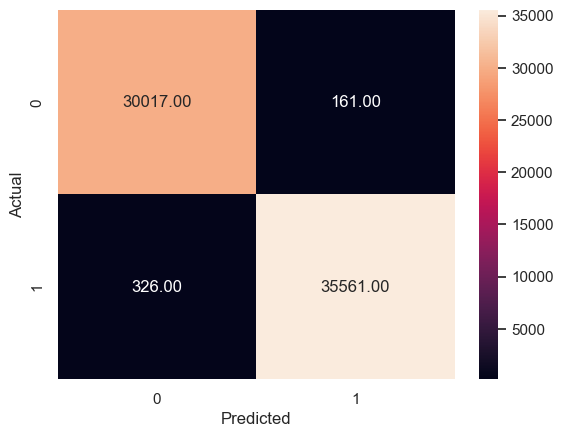

In [56]:
#checking on train set
y_pred_train7 = best_catboost.predict(X3_train)
metrics_score(y3_train, y_pred_train7)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     12608
           1       0.97      0.96      0.96     15706

    accuracy                           0.96     28314
   macro avg       0.96      0.96      0.96     28314
weighted avg       0.96      0.96      0.96     28314



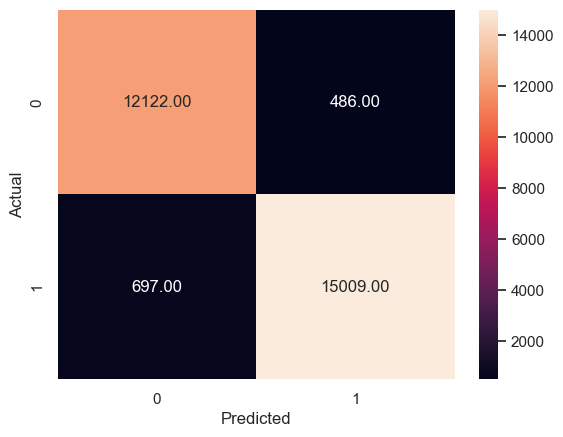

In [57]:
#checking on test set
y_pred_train8 = best_catboost.predict(X3_test)
metrics_score(y3_test, y_pred_train8)

In [58]:
new_test_data_catboosttuned =best_catboost.predict(check_testdata)

In [59]:
#Create a dataframe
df_outputtuned = pd.DataFrame({
    'ID': IDs,
    'Overall_Experience': new_test_data_catboosttuned
})

In [60]:
# Save to CSV
df_outputtuned.to_csv('catboost_tuned.csv', index=False)

In [ ]:
#Tuning Catboost Again
param_grid_refined = {
    'iterations': [1000, 1500, 2000],  # More iterations
    'learning_rate': [0.005, 0.01, 0.02, 0.05],  # Finer search around smaller learning rates
    'depth': [8, 10, 12],  # Added depth of 12
    'l2_leaf_reg': [5, 7, 9, 11, 13],  # Expanded a bit
    'border_count': [128, 254, 512],  # Added 512
    'bagging_temperature': [5, 10, 15]  # Added 15 for more aggressive bagging
}

# Initialize RandomizedSearchCV with the refined parameters
search_refined = RandomizedSearchCV(best_catboost, param_grid_refined, n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, random_state=42)

search_refined.fit(X3_train, y3_train)
print("Best Refined Parameters:", search_refined.best_params_)
print("Best Refined Score:", search_refined.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


#** Building a Decision Tree model**

In [ ]:
# Separating target variable and other variables
X=df2.drop(columns='Overall_Experience')
Y=df2['Overall_Experience']

NameError: ignored

In [ ]:
X.head() #checking

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
1,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,...,Good,Good,Male,Loyal Customer,48,Personal Travel,Eco,2200,9.0,0.0
2,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43,Business Travel,Business,1061,77.0,119.0
4,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,...,Good,Good,Female,Loyal Customer,50,Business Travel,Business,1981,0.0,0.0
5,Needs Improvement,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Good,Excellent,Good,Acceptable,Acceptable,...,Acceptable,Acceptable,Male,Loyal Customer,44,Business Travel,Business,2810,0.0,0.0
6,Good,Green Car,Excellent,Good,Inconvenient,Good,Good,Good,Good,Good,...,Acceptable,Good,Male,Loyal Customer,56,Personal Travel,Eco,2029,0.0,0.0


In [ ]:
Y.head() #checking target variable

1    0
2    1
4    1
5    1
6    0
Name: Overall_Experience, dtype: int64

In [ ]:
cat_col

['Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class']

In [ ]:
#Create dummies for X, convert categorial to binary numerical for machine learning
X = pd.get_dummies(X,columns = cat_col, drop_first=True)

In [ ]:
X.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,...,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco
1,48,2200,9.0,0.0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,1,1,1
2,43,1061,77.0,119.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,50,1981,0.0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
5,44,2810,0.0,0.0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
6,56,2029,0.0,0.0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,1,1


## **Splitting the data into 70% train and 30% test set**

In [ ]:
# Splitting the data into train and test sets
# stratify since there are more 0s than 1s in target variable
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Age                             0
Travel_Distance                 0
Departure_Delay_in_Mins         0
Arrival_Delay_in_Mins           0
Seat_Comfort_Excellent          0
                               ..
Online_Boarding_Poor            0
Gender_Male                     0
Customer_Type_Loyal Customer    0
Type_Travel_Personal Travel     0
Travel_Class_Eco                0
Length: 76, dtype: int64
------------------------------
Age                             0
Travel_Distance                 0
Departure_Delay_in_Mins         0
Arrival_Delay_in_Mins           0
Seat_Comfort_Excellent          0
                               ..
Online_Boarding_Poor            0
Gender_Male                     0
Customer_Type_Loyal Customer    0
Type_Travel_Personal Travel     0
Travel_Class_Eco                0
Length: 76, dtype: int64


In [ ]:
print(X_train.shape, X_test.shape)

(39020, 76) (16724, 76)


## Create confusion matrix

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Checking Decision Tree model on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17679
           1       1.00      1.00      1.00     21341

    accuracy                           1.00     39020
   macro avg       1.00      1.00      1.00     39020
weighted avg       1.00      1.00      1.00     39020



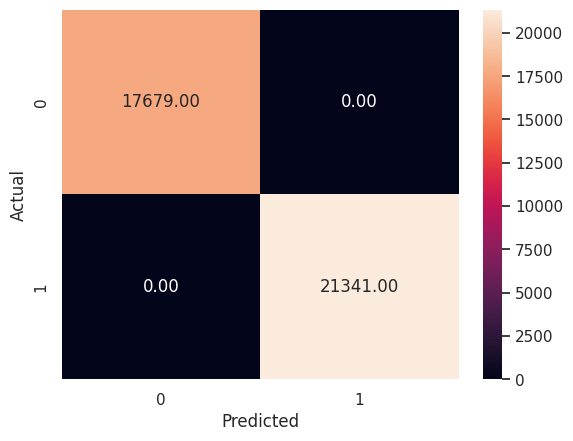

In [ ]:
y_pred_train1 = dtree.predict(X_train)
metrics_score(y_train, y_pred_train1)

## Checking Decision Tree model on test set

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7577
           1       0.93      0.94      0.94      9147

    accuracy                           0.93     16724
   macro avg       0.93      0.93      0.93     16724
weighted avg       0.93      0.93      0.93     16724



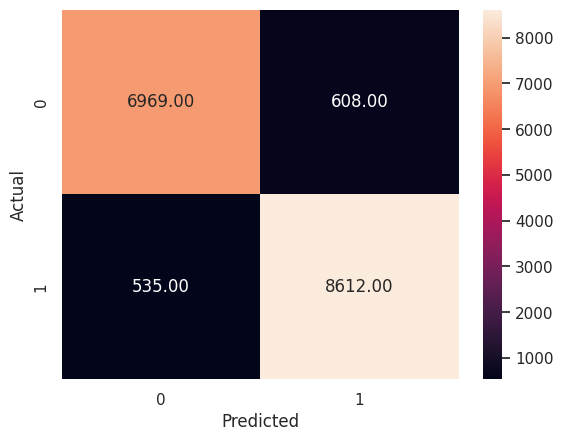

In [ ]:
y_pred_test1 = dtree.predict(X_test)
metrics_score(y_test, y_pred_test1)

**Observation :**

* Overfitting observed since model performed rather poorly on test data.
* Further tuning is needed

### Visualizing the decision tree

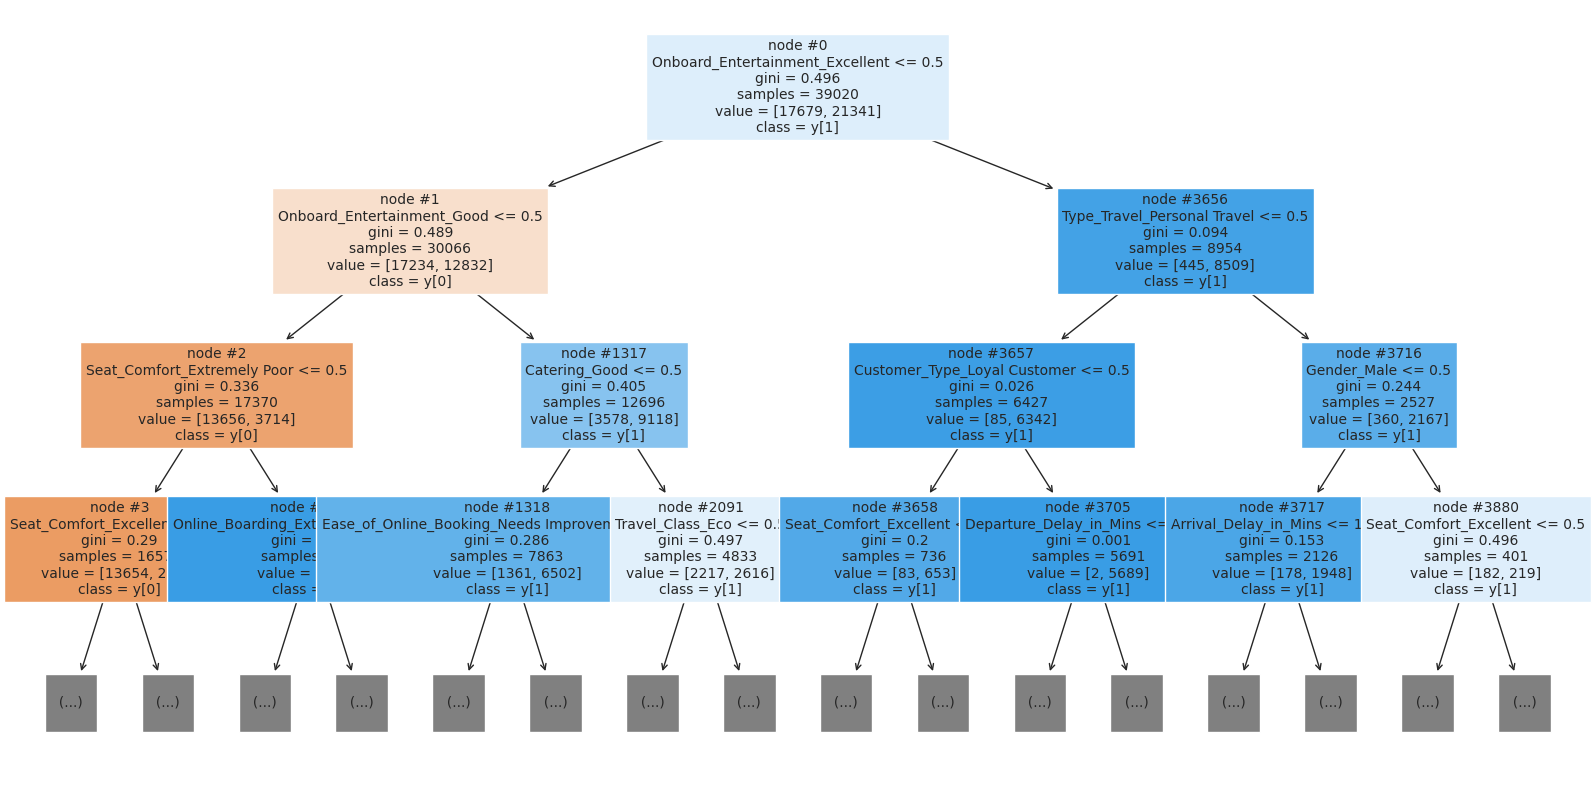

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dtree,
    max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    node_ids=True,
    class_names=True,
)

## **Conduct Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=250, min_samples_split=30,
                       random_state=1)

### Checking Tuned Decision Tree model on training set

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     17679
           1       0.95      0.95      0.95     21341

    accuracy                           0.94     39020
   macro avg       0.94      0.94      0.94     39020
weighted avg       0.94      0.94      0.94     39020



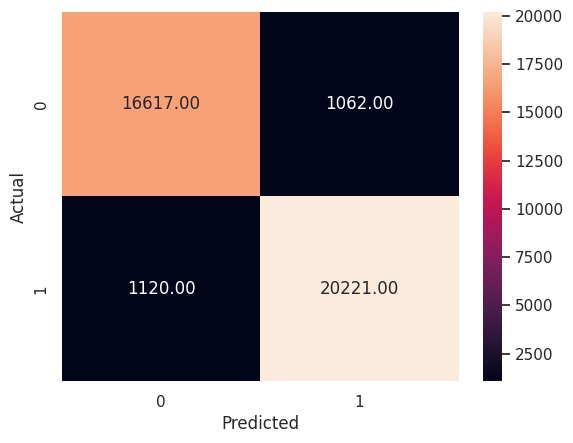

In [ ]:
y_pred_train2 = dtree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

### Checking Tuned Decision Tree model on training set

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7577
           1       0.94      0.94      0.94      9147

    accuracy                           0.93     16724
   macro avg       0.93      0.93      0.93     16724
weighted avg       0.93      0.93      0.93     16724



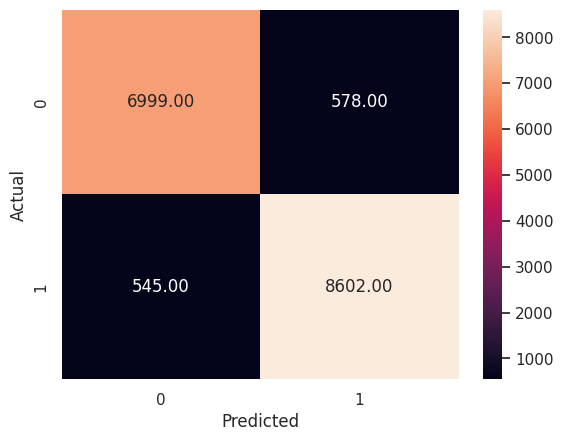

In [ ]:
y_pred_test2 = dtree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

### Visualizing the tuned decision tree

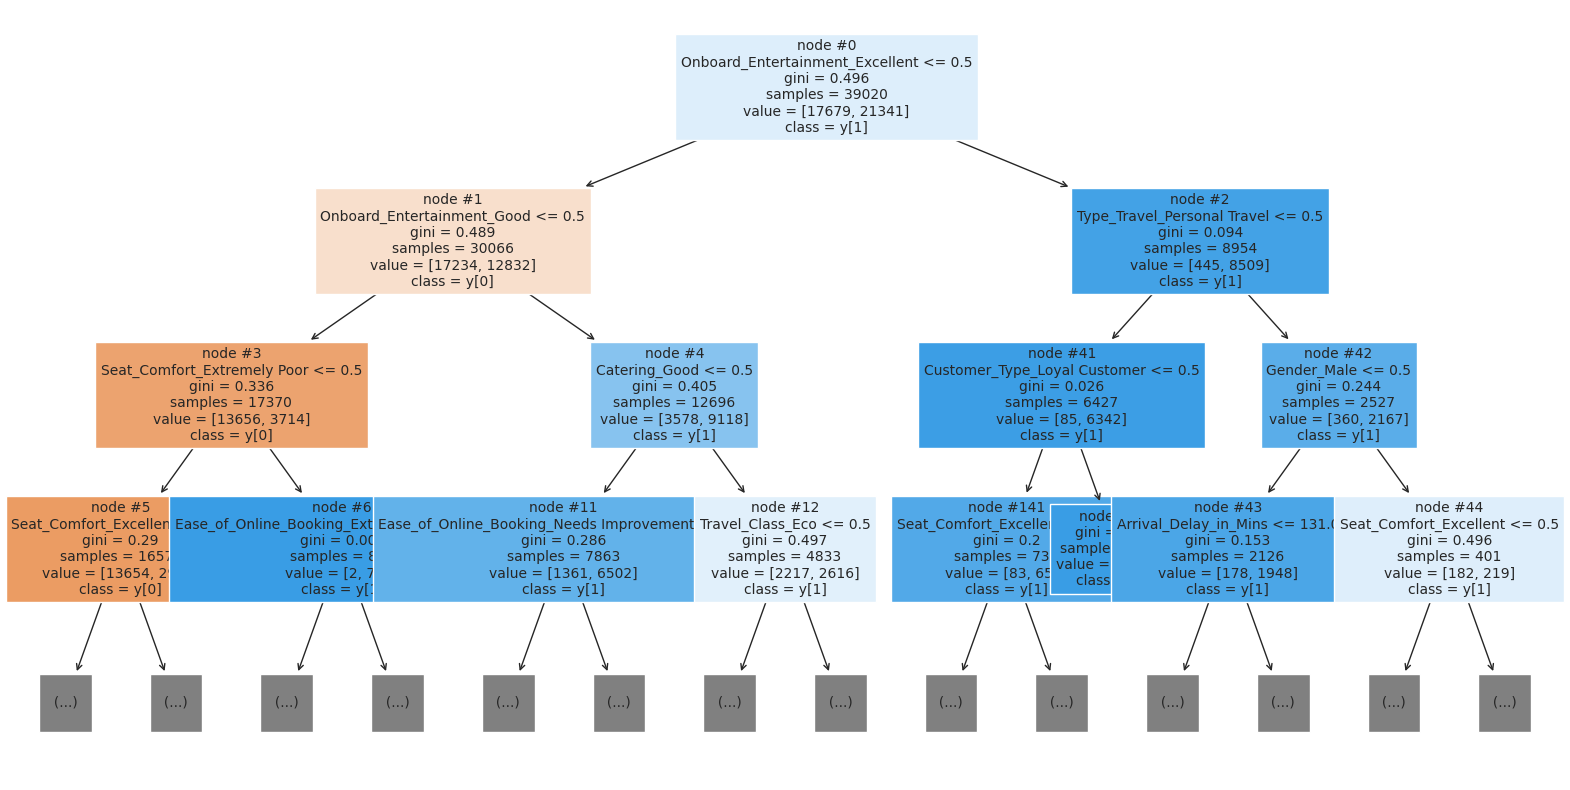

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dtree_tuned,
    max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=10,
    node_ids=True,
    class_names=True,
)

### **Checking important features in tuned decision tree**

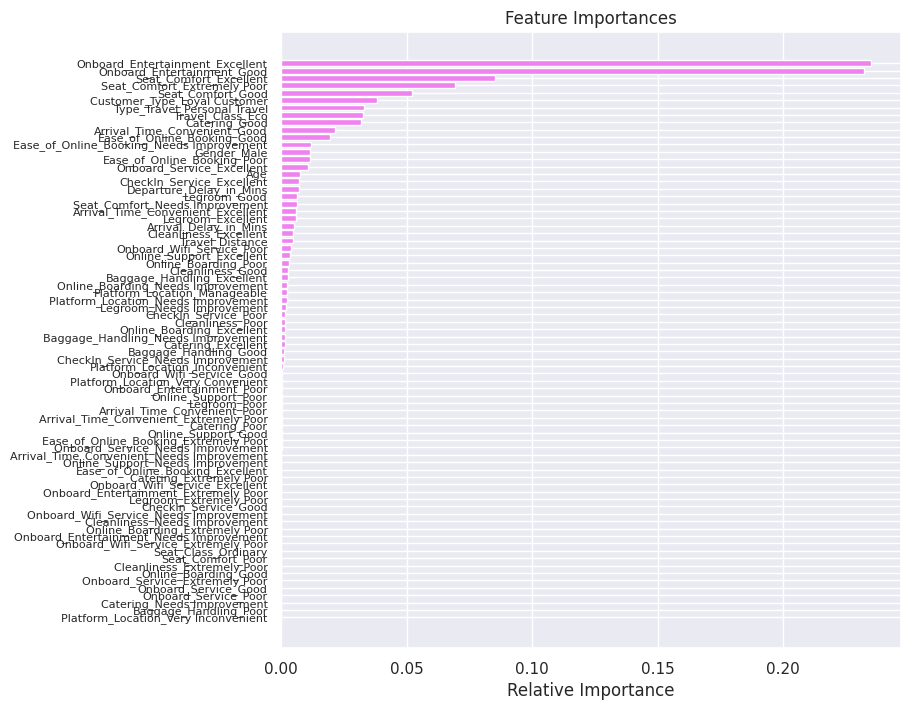

In [ ]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=8)  # reduced font size to 10
plt.xlabel("Relative Importance")
plt.show()


**Observation :**

* The top 3 most important features are **Onboard_Entertainment_Excellent**, **Onboard_Entertainment_Good** and **Seat Comfort_Excellent**

# **Building a Random Forest model**

In [ ]:
#fitting model to data
rf_estimator = RandomForestClassifier( random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

## Checking Random Forest model on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17679
           1       1.00      1.00      1.00     21341

    accuracy                           1.00     39020
   macro avg       1.00      1.00      1.00     39020
weighted avg       1.00      1.00      1.00     39020



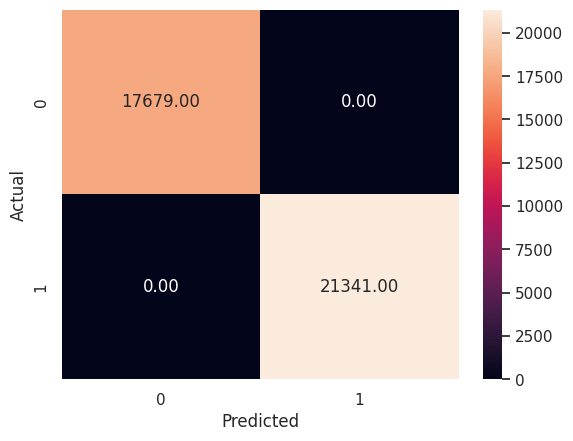

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

## Checking Random Forest model on test set

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7577
           1       0.96      0.94      0.95      9147

    accuracy                           0.95     16724
   macro avg       0.95      0.95      0.95     16724
weighted avg       0.95      0.95      0.95     16724



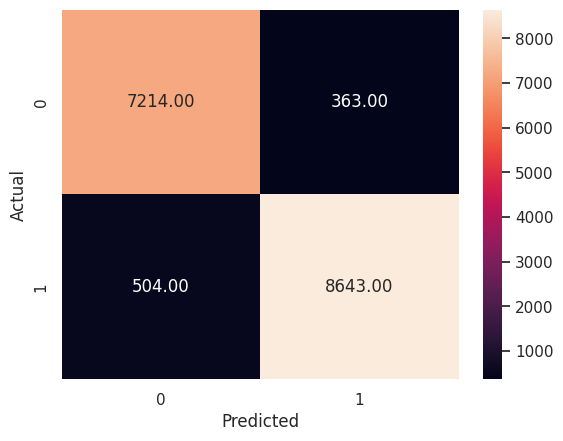

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

**Observation**

* Overfitting observed since model rather poorly on test data.
* Further tuning is needed
* The recall score is 0.73 which is lower compared to tuned decision tree 0.77.
* Precision score improved by 0.1 from Decision Tree model.

## **Conduct Hyperparameter Tuning on Random Forest**

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = RandomizedSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features='auto',
                       min_samples_leaf=3, random_state=1)

## Checking the tuned random forest on training data set

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     17679
           1       0.96      0.99      0.97     21341

    accuracy                           0.97     39020
   macro avg       0.97      0.97      0.97     39020
weighted avg       0.97      0.97      0.97     39020



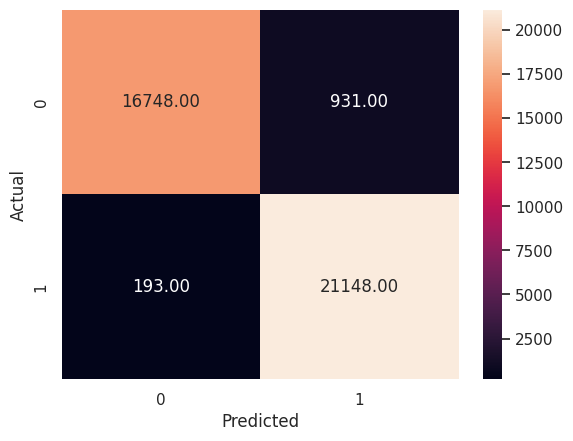

In [ ]:
y_pred_train4 = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

## Checking the tuned random forest on test data set

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7577
           1       0.92      0.96      0.94      9147

    accuracy                           0.93     16724
   macro avg       0.94      0.93      0.93     16724
weighted avg       0.94      0.93      0.93     16724



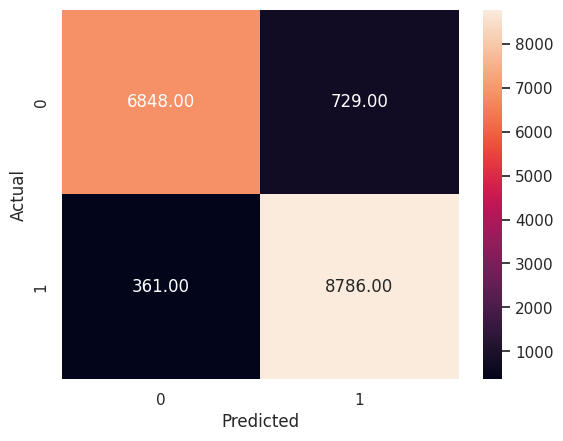

In [ ]:
y_pred_test4 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test4)

**Observation**

* The tuned random forest also shows some overfitting, but this performed slightly worse.

## **Checking important features in random forest**

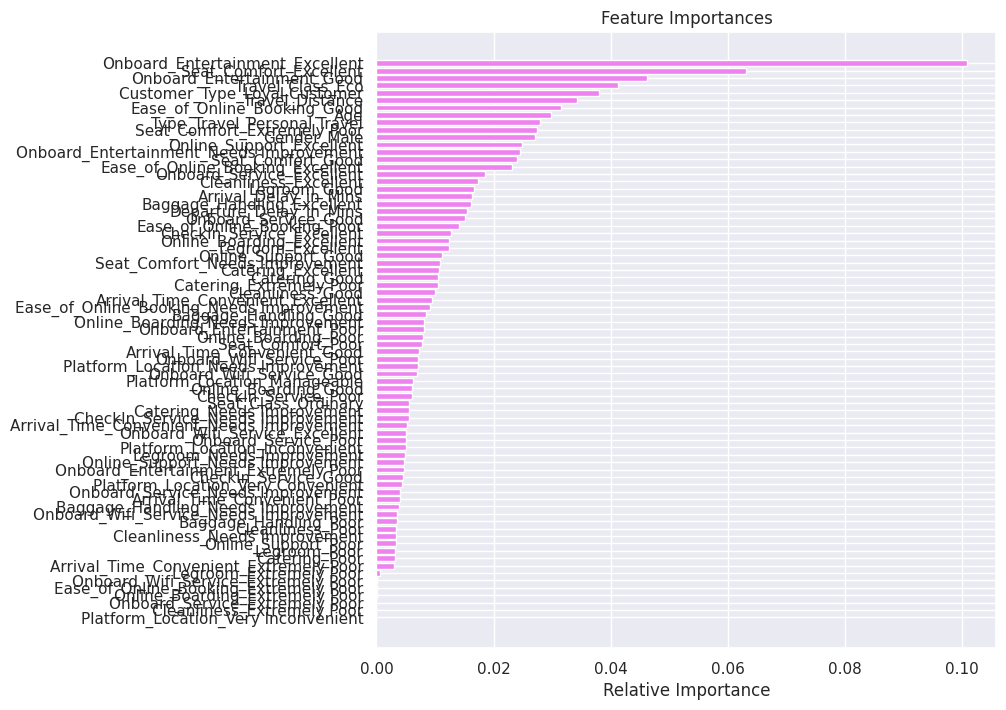

In [ ]:
importances = rf_estimator.feature_importances_ #decision tree attribute
indices = np.argsort(importances) #sort features
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center") # positions of the bars on the y-axis, creating horizontal bar chart, importance values
plt.yticks(range(len(indices)), [feature_names[i] for i in indices]) #replace y axis labels with feature name
plt.xlabel("Relative Importance")
plt.show()

# **Checking Test Set**

In [ ]:
test_travel_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Traveldata_test.csv')
test_survey_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Surveydata_test.csv')
test_data = pd.merge(test_travel_data, test_survey_data, on="ID")

In [ ]:
test_data.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
#Drop ID column
test_data.drop(columns='ID', inplace=True)

In [ ]:
#check info
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,35591.0,39.446995,15.137554,7.0,27.0,40.0,51.0,85.0
Travel_Distance,35602.0,1987.151761,1024.308863,50.0,1360.0,1929.0,2559.0,6868.0
Departure_Delay_in_Mins,35573.0,14.880696,37.895453,0.0,0.0,0.0,13.0,978.0
Arrival_Delay_in_Mins,35479.0,15.308802,38.531293,0.0,0.0,0.0,13.0,970.0


In [ ]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':test_data.isnull().sum()[test_data.isnull().sum()>0],'Percentage':(test_data.isnull().sum()[test_data.isnull().sum()>0]/test_data.shape[0])*100})

,Count,Percentage
Gender,30,0.084265
Customer_Type,3383,9.502275
Age,11,0.030897
Type_Travel,3448,9.684849
Departure_Delay_in_Mins,29,0.081456
Arrival_Delay_in_Mins,123,0.345486
Seat_Comfort,22,0.061794
Arrival_Time_Convenient,3325,9.339363
Catering,3357,9.429246
Platform_Location,12,0.033706


In [ ]:
#new dataframe
new_test_data = test_data.copy()

In [ ]:
#Impute Gender with Mode
new_test_data['Gender'].fillna(new_test_data['Gender'].mode()[0], inplace = True)

In [ ]:
#Impute Customer_Type with Mode
new_test_data['Customer_Type'].fillna(new_test_data['Customer_Type'].mode()[0], inplace = True)

In [ ]:
#Impute Age with Mean
new_test_data['Age'].fillna(new_test_data['Age'].mean(), inplace = True)

In [ ]:
#Impute Type_Travel with Mode
new_test_data['Type_Travel'].fillna(new_test_data['Type_Travel'].mode()[0], inplace = True)

In [ ]:
# Impute Departure_Delay_in_Mins with its median
new_test_data['Departure_Delay_in_Mins'].fillna(new_test_data['Departure_Delay_in_Mins'].median(), inplace=True)

In [ ]:
# Impute Departure_Delay_in_Mins with its median
new_test_data['Arrival_Delay_in_Mins'].fillna(new_test_data['Arrival_Delay_in_Mins'].median(), inplace=True)

In [ ]:
#Impute Seat_Comfort with Mode
new_test_data['Seat_Comfort'].fillna(new_test_data['Seat_Comfort'].mode()[0], inplace = True)

In [ ]:
#Impute Arrival_Time_Convenient with Mode
new_test_data['Arrival_Time_Convenient'].fillna(new_test_data['Arrival_Time_Convenient'].mode()[0], inplace = True)

In [ ]:
#Impute Catering with Mode
new_test_data['Catering'].fillna(new_test_data['Catering'].mode()[0], inplace = True)

In [ ]:
#Impute Platform_Location with Mode
new_test_data['Platform_Location'].fillna(new_test_data['Platform_Location'].mode()[0], inplace = True)

In [ ]:
#Impute Onboard_Wifi_Service with Mode
new_test_data['Onboard_Wifi_Service'].fillna(new_test_data['Onboard_Wifi_Service'].mode()[0], inplace = True)

In [ ]:
#Impute Onboard_Entertainment with Mode
new_test_data['Onboard_Entertainment'].fillna(new_test_data['Onboard_Entertainment'].mode()[0], inplace = True)

In [ ]:
#Impute Online_Support with Mode
new_test_data['Online_Support'].fillna(new_test_data['Online_Support'].mode()[0], inplace = True)

In [ ]:
#Impute Ease_of_Online_Booking with Mode
new_test_data['Ease_of_Online_Booking'].fillna(new_test_data['Ease_of_Online_Booking'].mode()[0], inplace = True)

In [ ]:
#Impute Onboard_Service with Mode
new_test_data['Onboard_Service'].fillna(new_test_data['Onboard_Service'].mode()[0], inplace = True)

In [ ]:
#Impute Legroom with Mode
new_test_data['Legroom'].fillna(new_test_data['Legroom'].mode()[0], inplace = True)

In [ ]:
#Impute Baggage_Handling with Mode
new_test_data['Baggage_Handling'].fillna(new_test_data['Baggage_Handling'].mode()[0], inplace = True)

In [ ]:
#Impute CheckIn_Service with Mode
new_test_data['CheckIn_Service'].fillna(new_test_data['CheckIn_Service'].mode()[0], inplace = True)

In [ ]:
#Impute Cleanliness with Mode
new_test_data['Cleanliness'].fillna(new_test_data['Cleanliness'].mode()[0], inplace = True)

In [ ]:
#Impute Online_Boarding with Mode
new_test_data['Online_Boarding'].fillna(new_test_data['Online_Boarding'].mode()[0], inplace = True)

In [ ]:
# checking missing values after imputation
pd.DataFrame({'Count':new_test_data.isnull().sum()[new_test_data.isnull().sum()>0],'Percentage':(new_test_data.isnull().sum()[new_test_data.isnull().sum()>0]/new_test_data.shape[0])*100})

,Count,Percentage


In [ ]:
#one hot encode
new_test_data=pd.get_dummies(new_test_data, drop_first=True)

In [ ]:
new_test_data.shape

(35602, 73)

In [ ]:
new_test_data.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,...,CheckIn_Service_Poor,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,36.0,532,0.0,0.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,21.0,1425,9.0,28.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,60.0,2832,0.0,0.0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,29.0,1352,0.0,0.0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,18.0,1610,17.0,0.0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
X_train.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,...,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco
36469,36,427,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
10477,44,117,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
48315,43,590,0.0,0.0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0
45613,54,474,0.0,0.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
58015,55,1442,0.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Find columns in X_train that are not in test_data
missing_columns = [col for col in X_train.columns if col not in new_test_data.columns]
print("Missing columns in X_test:", missing_columns)

Missing columns in X_test: ['Platform_Location_Very Inconvenient', 'Onboard_Service_Extremely Poor', 'Cleanliness_Extremely Poor']


In [ ]:
#Add these missing columns to test_data with values set to zero
for col in missing_columns:
    new_test_data[col] = 0

In [ ]:
new_test_data.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,...,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Platform_Location_Very Inconvenient,Onboard_Service_Extremely Poor,Cleanliness_Extremely Poor
0,36.0,532,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,21.0,1425,9.0,28.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,60.0,2832,0.0,0.0,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
3,29.0,1352,0.0,0.0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,18.0,1610,17.0,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#match the order of columns in test_data and X
new_test_data = new_test_data[X_train.columns]


**Testing with Random Forest**

In [ ]:
new_test_data_rf = rf_estimator.predict(new_test_data)

In [ ]:
#Putting back ID column
original_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Traveldata_test.csv")
IDs = original_test_data["ID"].values

In [ ]:
#Create a dataframe
df_output = pd.DataFrame({
    'ID': IDs,
    'Overall_Experience': new_test_data_rf
})

In [ ]:
# Save to CSV
df_output.to_csv('output.csv', index=False)

# **XGBoost**

In [ ]:
# Separating target variable and other variables
X2=data_join.drop(columns='Overall_Experience')
Y2=data_join['Overall_Experience']

In [ ]:
X2.head() #checking

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
X2=X2.drop(columns='ID')

In [ ]:
Y2.head() #checking target variable

0    0
1    0
2    1
3    0
4    1
Name: Overall_Experience, dtype: int64

In [ ]:
Y2.value_counts()

1    51593
0    42786
Name: Overall_Experience, dtype: int64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.5f')  # .5g formats to 5 significant figures
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [ ]:
cat_col

['Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class']

In [ ]:
#Create dummies for X, convert categorial to binary numerical for machine learning
X2 = pd.get_dummies(X2,columns = cat_col, drop_first=True)

In [ ]:
X2.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,...,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco
0,52.0,272,0.0,5.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,48.0,2200,9.0,0.0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,1,1,1
2,43.0,1061,77.0,119.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,44.0,780,13.0,18.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,50.0,1981,0.0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


### **Splitting the data into 70% train and 30% test set**

In [ ]:
# Splitting the data into train and test sets
# stratify since there are more 0s than 1s in target variable
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,Y2,test_size=0.30,random_state=1, stratify = Y2)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X2_train.isna().sum())
print("-" * 30)
print(X2_test.isna().sum())

Age                              22
Travel_Distance                   0
Departure_Delay_in_Mins          45
Arrival_Delay_in_Mins           266
Seat_Comfort_Excellent            0
                               ... 
Online_Boarding_Poor              0
Gender_Male                       0
Customer_Type_Loyal Customer      0
Type_Travel_Personal Travel       0
Travel_Class_Eco                  0
Length: 78, dtype: int64
------------------------------
Age                             11
Travel_Distance                  0
Departure_Delay_in_Mins         12
Arrival_Delay_in_Mins           91
Seat_Comfort_Excellent           0
                                ..
Online_Boarding_Poor             0
Gender_Male                      0
Customer_Type_Loyal Customer     0
Type_Travel_Personal Travel      0
Travel_Class_Eco                 0
Length: 78, dtype: int64


In [ ]:
print(X2_train.shape, X2_test.shape)

(66065, 78) (28314, 78)


In [ ]:
X2_train.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,...,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco
90112,49.0,2023,64.0,56.0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
54258,45.0,4879,160.0,146.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
58136,25.0,3779,0.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
23288,21.0,1928,0.0,20.0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
31834,35.0,2331,2.0,1.0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
# Assuming it's a classification task. For regression, use XGBRegressor.
xgb_model = XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb_model.fit(X2_train, y2_train)  # Assuming you have X_train and y_train already.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Checking the xgboost on training data set

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     29950
           1       0.98      0.97      0.97     36115

    accuracy                           0.97     66065
   macro avg       0.97      0.97      0.97     66065
weighted avg       0.97      0.97      0.97     66065



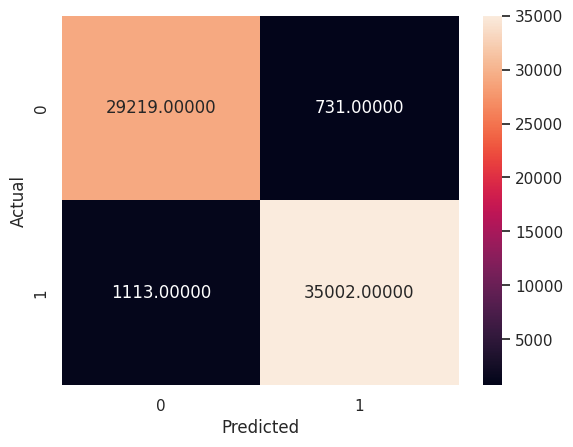

In [ ]:
y_pred_train5 = xgb_model.predict(X2_train)
metrics_score(y2_train, y_pred_train5)

**Checking the tuned random forest on test data set**

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12836
           1       0.96      0.95      0.96     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



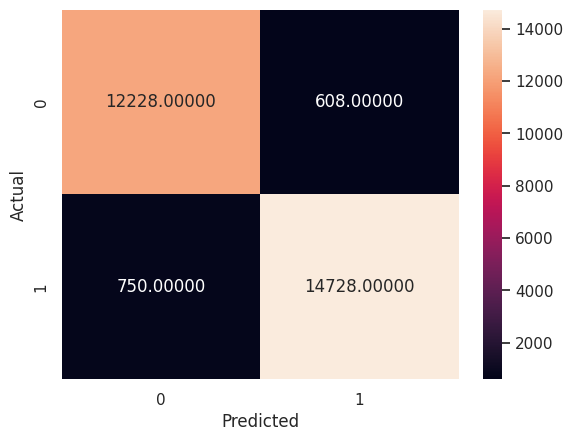

In [ ]:
#testing
y_pred_test5 = xgb_model.predict(X2_test)
metrics_score(y2_test, y_pred_test5)

# **Testing with new test data set**

In [ ]:
#new dataframe
new_test_data2 = test_data.copy()

NameError: ignored

In [ ]:
#one hot encode
new_test_data2=pd.get_dummies(new_test_data2, drop_first=True)

In [ ]:
new_test_data2.shape

(35602, 73)

In [ ]:
new_test_data2.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,...,CheckIn_Service_Poor,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,36.0,532,0.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,21.0,1425,9.0,28.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,60.0,2832,0.0,0.0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,29.0,1352,0.0,0.0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,18.0,1610,17.0,0.0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# Find columns in X_train that are not in test_data
missing_columns2 = [col for col in X2_train.columns if col not in new_test_data2.columns]
print("Missing columns in X_test:", missing_columns2)

Missing columns in X_test: ['Platform_Location_Very Inconvenient', 'Online_Support_Extremely Poor', 'Onboard_Service_Extremely Poor', 'CheckIn_Service_Extremely Poor', 'Cleanliness_Extremely Poor']


In [ ]:
#Add these missing columns to test_data with values set to zero
for col in missing_columns2:
    new_test_data2[col] = 0

In [ ]:
new_test_data2.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal Customer,Type_Travel_Personal Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,...,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Platform_Location_Very Inconvenient,Online_Support_Extremely Poor,Onboard_Service_Extremely Poor,CheckIn_Service_Extremely Poor,Cleanliness_Extremely Poor
0,36.0,532,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,21.0,1425,9.0,28.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,60.0,2832,0.0,0.0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,29.0,1352,0.0,0.0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,18.0,1610,17.0,0.0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#match the order of columns in test_data and X
new_test_data2 = new_test_data2[X2_train.columns]


**Testing with Random Forest**

In [ ]:
new_test_data2_xgboost = xgb_model.predict(new_test_data2)

In [ ]:
#Putting back ID column
original_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Traveldata_test.csv")
IDs = original_test_data["ID"].values

In [ ]:
#Create a dataframe
df_output2 = pd.DataFrame({
    'ID': IDs,
    'Overall_Experience': new_test_data2_xgboost
})

In [ ]:
# Save to CSV
df_output2.to_csv('xgboostoutput3.csv', index=False)

# Tuning XGboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Set the hyperparameters' range
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 250, 500, 1000],
    'max_depth': [3, 5, 7, 9, 10],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0],
    'min_child_weight': [1, 2, 3, 4]
}

# Initialize XGBoost classifier
xgb_tunedmodel = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Random search
random_search = RandomizedSearchCV(
    xgb_tunedmodel,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X2_train, y2_train)

# Output the best parameters and corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))


Fitting 5 folds for each of 4374 candidates, totalling 21870 fits


KeyboardInterrupt: ignored

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29950
           1       0.99      0.98      0.99     36115

    accuracy                           0.99     66065
   macro avg       0.98      0.99      0.99     66065
weighted avg       0.99      0.99      0.99     66065



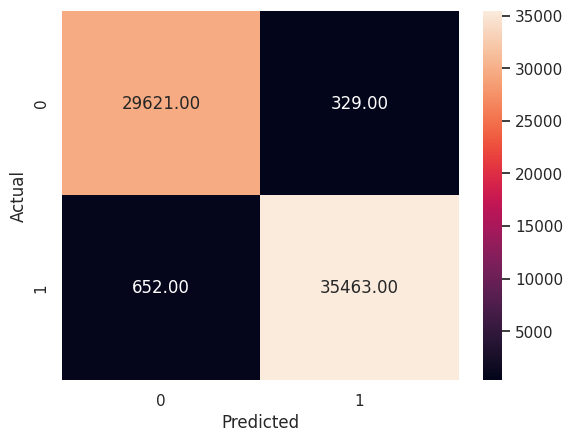

In [ ]:
best_xgb = random_search.best_estimator_

# Predictions
y_pred_train6 = best_xgb.predict(X2_train)
metrics_score(y2_train, y_pred_train6)




              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12836
           1       0.96      0.95      0.96     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



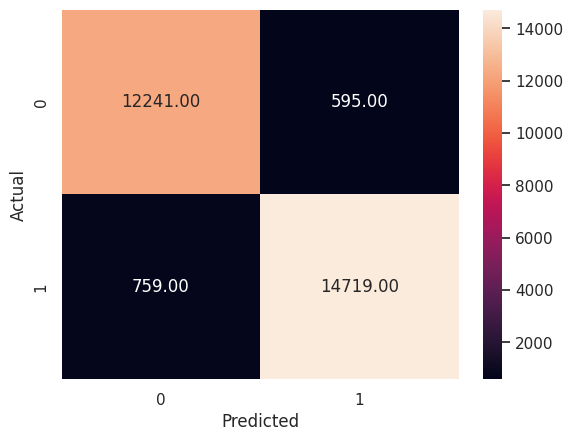

In [ ]:
# Predictions
y_pred_test6 = best_xgb.predict(X2_test)
metrics_score(y2_test, y_pred_test6)


**Testing with tuned XGboost**

In [ ]:
new_test_data2_xgboost = best_xgb.predict(new_test_data2)

In [ ]:
#Putting back ID column
original_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Traveldata_test.csv")
IDs = original_test_data["ID"].values

In [ ]:
#Create a dataframe
df_output3 = pd.DataFrame({
    'ID': IDs,
    'Overall_Experience': new_test_data2_xgboost
})

In [ ]:
# Save to CSV
df_output3.to_csv('xgboostoutput3.csv', index=False)

# Tuning XGboost GridSearch

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Set the hyperparameters' range
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 250, 1000],
    'max_depth': [3, 6, 9],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.7, 1.0],
    'gamma': [0, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 10.0],
    'min_child_weight': [1, 3]
}

# [rest of the code remains the same]


# Initialize XGBoost classifier
xgb_tunedmodel2 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Grid search
grid_search2 = GridSearchCV(
    xgb_tunedmodel2,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search2.fit(X2_train, y2_train)

# Output the best parameters and corresponding score
print("Best parameters found: ", grid_search2.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search2.best_score_))



Fitting 5 folds for each of 4374 candidates, totalling 21870 fits


              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29950
           1       0.99      0.98      0.99     36115

    accuracy                           0.99     66065
   macro avg       0.98      0.99      0.99     66065
weighted avg       0.99      0.99      0.99     66065



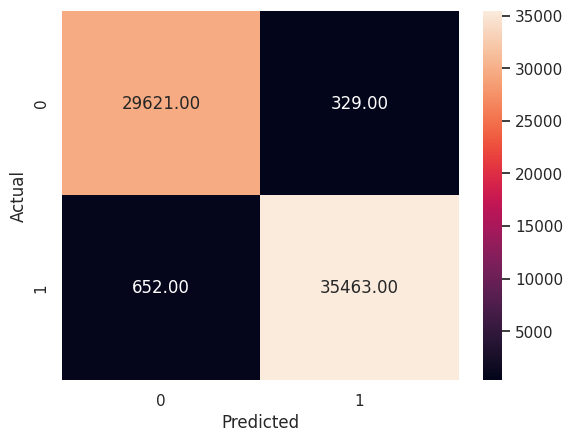

In [ ]:
best_xgb2 = grid_search2.best_estimator_

# Predictions
y_pred_train7 = best_xgb2.predict(X2_train)
metrics_score(y2_train, y_pred_train7)




              precision    recall  f1-score   support

           0       0.94      0.95      0.95     12836
           1       0.96      0.95      0.96     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



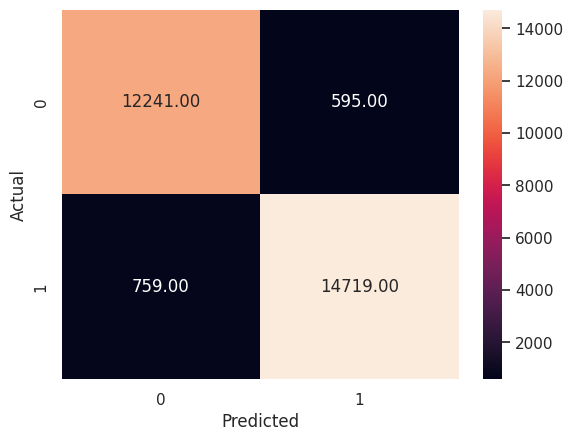

In [ ]:
# Predictions
y_pred_test7 = best_xgb2.predict(X2_test)
metrics_score(y2_test, y_pred_test7)


**Testing with tuned XGboost**

In [ ]:
new_test_data2_xgboost_tuned = best_xgb2.predict(new_test_data2)

In [ ]:
#Putting back ID column
original_test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Traveldata_test.csv")
IDs = original_test_data["ID"].values

In [ ]:
#Create a dataframe
df_output4 = pd.DataFrame({
    'ID': IDs,
    'Overall_Experience': new_test_data2_xgboost_tuned
})

In [ ]:
# Save to CSV
df_output4.to_csv('xgboostoutput4.csv', index=False)